# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import Counter

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

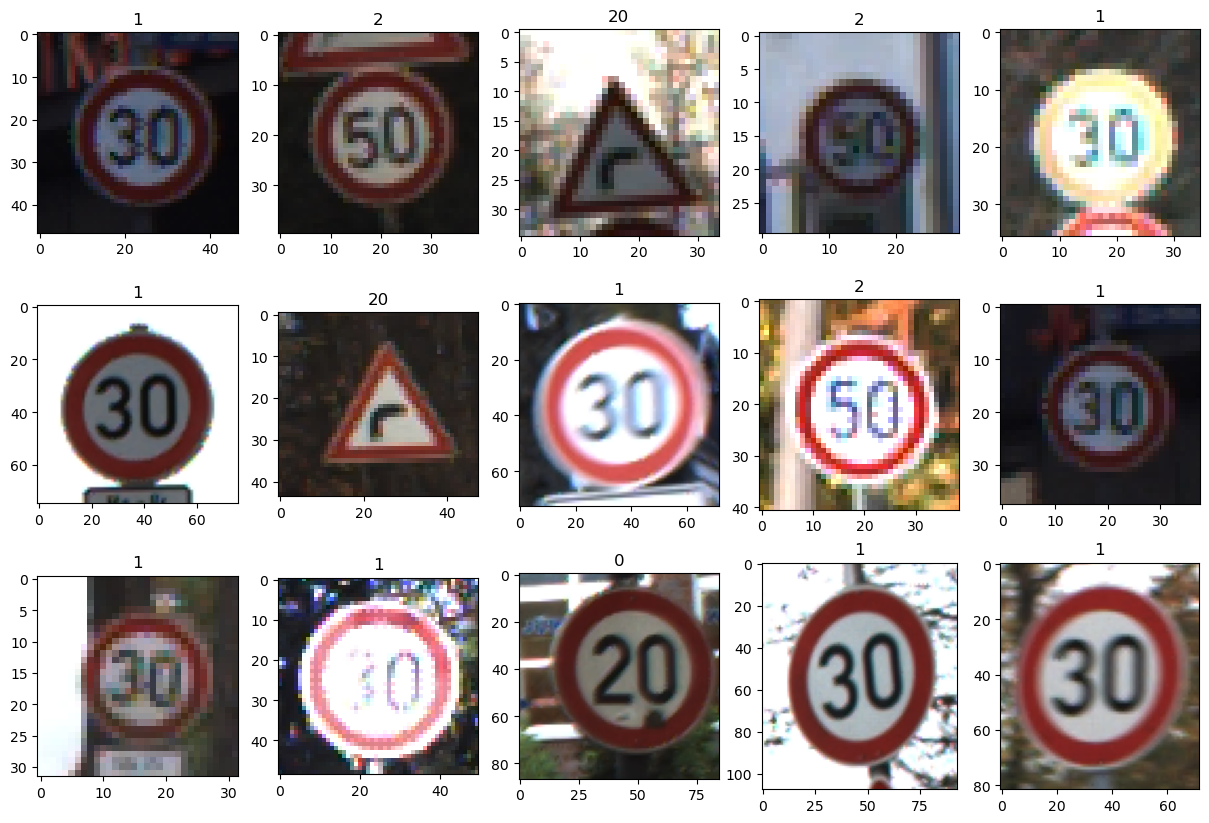

In [12]:
# Load the training labels
root = './data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = 5000

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [29]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

243
225


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

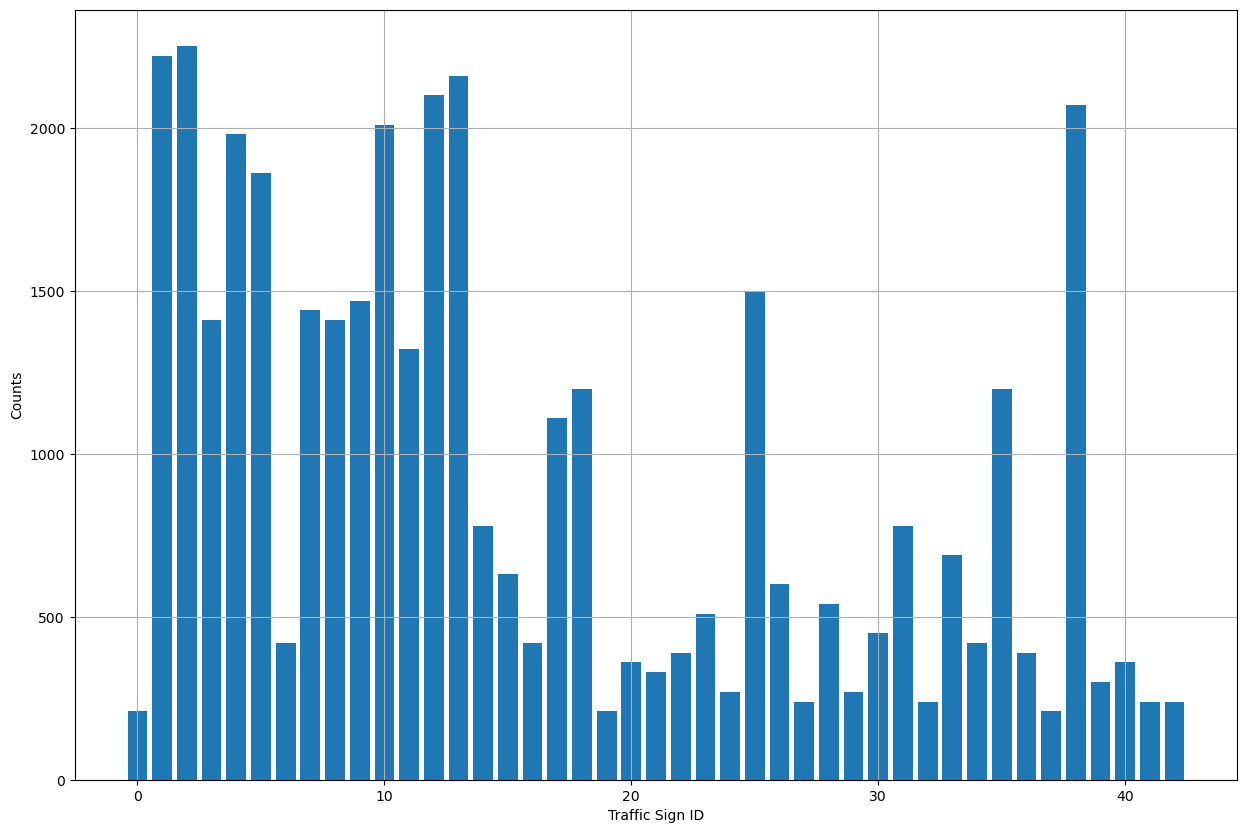

In [20]:
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why? 
    
    Абсолютно не сбалансированный датасет, есть 5 классы которые больше 2000, а есть 18 которые меньше 500 

* Are there any classes that are (significantly) over-represented or under-represeneted?
    
    Да, например класс 1,2,12,13,38 их очень много, а вот 0,19,24,27,29,32,37 совсем мало
    
    

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?

    Большие разбежности в раземерах изображенией максимальные от 243рх по ширине до 255рх по высоте и минимальные 25рх по высоте и ширине
    
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?
    
    Явный перекос в стороноу темных изображений темных 32755 и светлых 6454
    

In [42]:
print(data['Width'].max(),'- max width;', data['Height'].max(),'- max height')
print(data['Width'].min(),'- min width;', data['Height'].min(),'- min height')

243 - max width; 225 - max height
25 - min width; 25 - min height


In [66]:
im_dark = im_white = 0
for ii in range(len(data)):
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    br = np.average(img)
    if br <= 127:
        im_dark +=1
    else:
        im_white +=1

print("Dark images: ",im_dark)
print("White images: ",im_white)

Dark images:  32755
White images:  6454
